In [2]:
from numpy import *
import operator

In [3]:
#文件每一行格式是40920	8.326976	0.953952	largeDoses
def file2matrix(filename):
    love_dictionary={'largeDoses':3, 'smallDoses':2, 'didntLike':1}
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)            #get the number of lines in the file
    returnMat = zeros((numberOfLines,3))        #prepare matrix to return
    classLabelVector = []                       #prepare labels return   
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        if(listFromLine[-1].isdigit()):
            classLabelVector.append(int(listFromLine[-1]))
        else:
            classLabelVector.append(love_dictionary.get(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector

In [4]:
dating_data_mat,dating_labels=file2matrix('datingTestSet.txt')

In [5]:
dating_data_mat
#每一行表示飞行里程，游戏时间的百分比，冰淇淋的公升数

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

In [6]:
dating_labels
#上面定义了3：很大魅力，2：一般 1：不喜欢

[3,
 2,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 3,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 3,
 3,
 1,
 2,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 1,
 2,
 3,
 2,
 2,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 2,
 3,
 1,
 3,
 1,
 2,
 2,
 1,
 1,
 3,
 3,
 1,
 2,
 1,
 3,
 3,
 2,
 1,
 1,
 3,
 1,
 2,
 3,
 3,
 2,
 3,
 3,
 1,
 2,
 3,
 2,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 3,
 3,
 3,
 1,
 3,
 2,
 2,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 1,
 1,
 3,
 3,
 2,
 3,
 3,
 1,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 1,
 2,
 2,
 1,
 1,
 3,
 2,
 3,
 3,
 1,
 2,
 1,
 3,
 1,
 2,
 3,
 2,
 3,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 3,
 2,
 1,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 1,
 1,
 3,
 1,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 3,
 1,
 3,
 3,
 2,
 1,
 1,
 1,
 2,
 1,
 3,
 3,
 3,
 3,
 2,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 3,
 1,
 3,
 2,
 2,
 3,
 1,
 3,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 3,
 1,
 3,
 2,
 3,
 1,
 2,
 3,
 1,


In [7]:
print(len(dating_data_mat))

1000


In [8]:
print(len(dating_labels))

1000


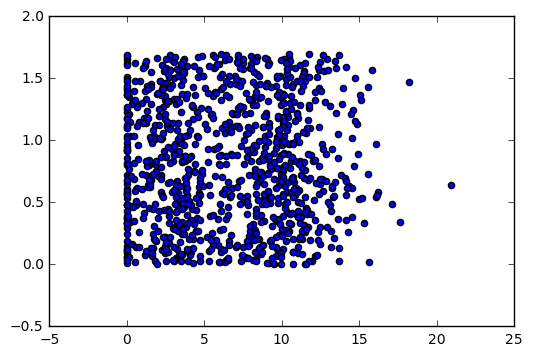

In [9]:
import matplotlib
import matplotlib.pyplot as plt
fig=plt.figure()
#1x1的图 第一个图
ax=fig.add_subplot(111)
ax.scatter(dating_data_mat[:,1],dating_data_mat[:,2])
plt.show()

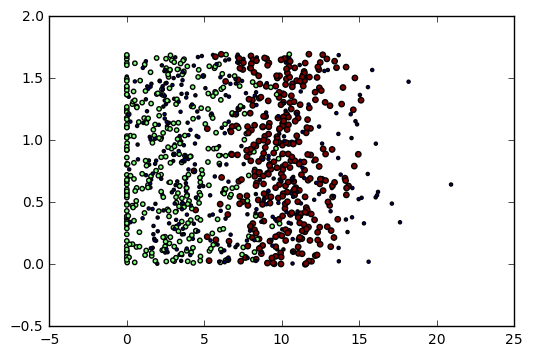

In [17]:
fig=plt.figure()
ax=fig.add_subplot(111)
#不同色彩，不同大小的点
ax.scatter(dating_data_mat[:,1],dating_data_mat[:,2],5.0*array(dating_labels),20.0*array(dating_labels))
plt.show()

In [18]:
#归一化，平衡三种特种对距离的影响
def autoNorm(dataSet):
    minVals = dataSet.min(0)#每一列的最小值 1x3
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals#每一列的范围 1x3
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1))
    normDataSet = normDataSet/tile(ranges, (m,1))   #每一行都归一化
    return normDataSet, ranges, minVals
norm_mat,ranges,minvals=autoNorm(dating_data_mat)

In [19]:
norm_mat

array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

In [20]:
ranges

array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00])

In [21]:
minvals

array([ 0.      ,  0.      ,  0.001156])

In [25]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()     
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

def datingClassTest():
    hoRatio = 0.10      #多少比例不用来测试
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')       #load data setfrom file
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)#1：num 用作输入测试，num到后面 用作数据集
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print "the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i])
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print "the total error rate is: %f" % (errorCount/float(numTestVecs))
    print errorCount
datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

In [32]:
#自己输入点，预测分类
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(raw_input("percentage of time spent playing video games?"))
    ffMiles = float(raw_input("frequent flier miles earned per year?"))
    iceCream = float(raw_input("liters of ice cream consumed per year?"))
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, percentTats, iceCream, ])
    classifierResult = classify0((inArr - minVals)/ranges, normMat, datingLabels, 3)
    print "You will probably like this person: %s" % resultList[classifierResult - 1]

In [33]:
classifyPerson()

percentage of time spent playing video games?22
frequent flier miles earned per year?22
liters of ice cream consumed per year?123
You will probably like this person: in large doses
